# 4. Python for DE- Data Quality

- Data quality testing has to do with the transformed data since the output of a data pipeline is data
- We expect the transformed data to have certain characteristics
    - Uniuqueness
    - Allowed values as per business
    - Outliers 
- This is especially important when the data pipeline feeds to a ML model

- Typical Flow of Data Quality tests
    1. Transformed data is loaded into a temp staging table
    2. Quality checks are applied on the staging table and in case if it fails then it sends out an alert. In some cases the data is not loaded further

## Basics of `cuallee`
- provides a Python-centric, transparent, and robust solution for data quality testing, particularly suited for teams operating in hybrid environments or undergoing technology migrations.

---

### 3 Main Entities of `cuallee`
1. **Check**
- Used to define a group of validations on a dataframe and returns `WARNING` or `ERROR`
- Rules can be chained into Checks

2. **Rule**
- Represents the predicate that you want to test
- A rule needs 4 attributes
    - `method`: name of the predicate
    - `column`: column in the dataframe
    - `value`: value to compare
    - `coverage` : the percentage of positive predicate necessary to set the status of the check to PASS  

3. **Control**
- Currently supported only in PySpark
- allows to run pre-fabricated checks that target all columns in a dataframe
- Main advantage is that you do not need to apply rules to each column separately


### Process
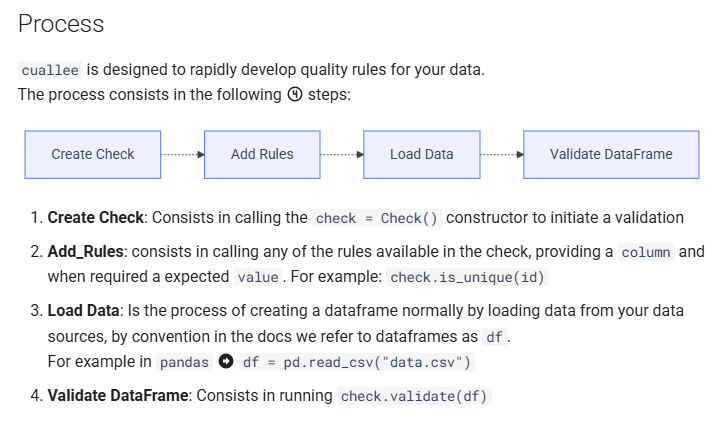

In [4]:
import polars as pl
from cuallee import Check, CheckLevel

In [6]:
# Read CSV file into Polars DataFrame
df = pl.read_csv("sample_data.csv")

# Question: Check for Nulls on column Id and that Customer_ID column is unique
# check docs at https://canimus.github.io/cuallee/polars/ on how to define a check and run it.
# you will end up with a dataframe of results, check that the `status` column does not have any "FAIL" in it

# initialise check object
check = Check()

# https://canimus.github.io/cuallee/module/check/#cuallee.Check.is_unique
check.is_unique("Customer_ID")
check_for_unique = check.validate(df)


#https://canimus.github.io/cuallee/module/check/?h=null#cuallee.Check.is_empty
check.is_empty("Customer_ID")
check_for_null = check.validate(df)

In [7]:
check_for_unique

id,timestamp,check,level,column,rule,value,rows,violations,pass_rate,pass_threshold,status
i64,str,str,str,str,str,str,i64,i64,f64,f64,str
1,"""2025-01-31 09:04:10""","""cuallee.check""","""WARNING""","""Customer_ID""","""is_unique""","""N/A""",108,16,0.851852,1.0,"""FAIL"""


In [8]:
check_for_null

id,timestamp,check,level,column,rule,value,rows,violations,pass_rate,pass_threshold,status
i64,str,str,str,str,str,str,i64,i64,f64,f64,str
1,"""2025-01-31 09:04:10""","""cuallee.check""","""WARNING""","""Customer_ID""","""is_unique""","""N/A""",108,16,0.851852,1.0,"""FAIL"""
2,"""2025-01-31 09:04:10""","""cuallee.check""","""WARNING""","""Customer_ID""","""is_empty""","""N/A""",108,108,0.0,1.0,"""FAIL"""


In [9]:
check = Check(CheckLevel.ERROR, "Completeness")
validation_results_df = (
    check.is_complete("Customer_ID").is_unique("Customer_ID").validate(df)
)
print(validation_results_df)

results = validation_results_df["status"].to_list()
assert "FAIL" not in results == True

shape: (2, 12)
┌─────┬───────────┬───────────┬───────┬───────────┬───────────┬───────┬──────┬──────────┬──────────┬──────────┬────────┐
│ id  ┆ timestamp ┆ check     ┆ level ┆ column    ┆ rule      ┆ value ┆ rows ┆ violatio ┆ pass_rat ┆ pass_thr ┆ status │
│ --- ┆ ---       ┆ ---       ┆ ---   ┆ ---       ┆ ---       ┆ ---   ┆ ---  ┆ ns       ┆ e        ┆ eshold   ┆ ---    │
│ i64 ┆ str       ┆ str       ┆ str   ┆ str       ┆ str       ┆ str   ┆ i64  ┆ ---      ┆ ---      ┆ ---      ┆ str    │
│     ┆           ┆           ┆       ┆           ┆           ┆       ┆      ┆ i64      ┆ f64      ┆ f64      ┆        │
╞═════╪═══════════╪═══════════╪═══════╪═══════════╪═══════════╪═══════╪══════╪══════════╪══════════╪══════════╪════════╡
│ 1   ┆ 2025-01-3 ┆ Completen ┆ ERROR ┆ Customer_ ┆ is_comple ┆ N/A   ┆ 108  ┆ 0        ┆ 1.0      ┆ 1.0      ┆ PASS   │
│     ┆ 1         ┆ ess       ┆       ┆ ID        ┆ te        ┆       ┆      ┆          ┆          ┆          ┆        │
│     ┆ 09:04:10 

AssertionError: 